In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

# Génération des données

In [3]:
def cible(x):
    return np.sin(x)-2*np.cos(x/2)

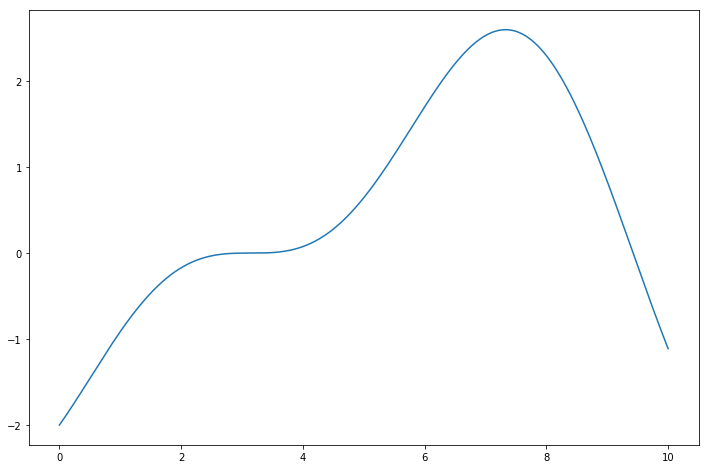

In [4]:
x = np.linspace(0, 10, 1000)
y = cible(x)
plt.plot(x,y)

In [5]:
rdg = np.random.RandomState(seed=10)

In [8]:
class Dataset:
    def __init__(self, nb, err):
        self.nb = nb
        self.err = err
        self.x = 10*rdg.rand(self.nb)
        self.target = cible(self.x)+err*rdg.randn(nb)
        self.data = self.x[:,np.newaxis]
        
    def affichage(self, ax):
        ax.scatter(self.x, self.target, color="red", label="observations")

def affichage(ax, fonction):
    x = np.linspace(0, 10, 1000)
    y = cible(x)
    ax.plot(x,y, label="fonction cible")

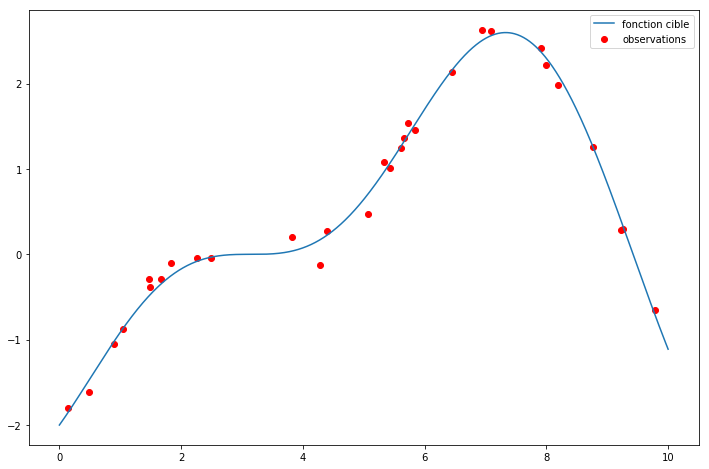

In [10]:
donnee = Dataset(nb=30, err=0.1)
fig, ax = plt.subplots()
donnee.affichage(ax)
affichage(ax, cible)
ax.legend();

# Essais pipeline


In [19]:
import sklearn

In [20]:
sklearn.__version__

'0.19.1'

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
from sklearn.model_selection import train_test_split

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
X_train, X_test, y_train, y_test = train_test_split(donnee.data, donnee.target)

In [32]:
mod = make_pipeline(PolynomialFeatures(degree=1), LinearRegression(normalize=True))

In [17]:
mod.fit(X=X_train, y=y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

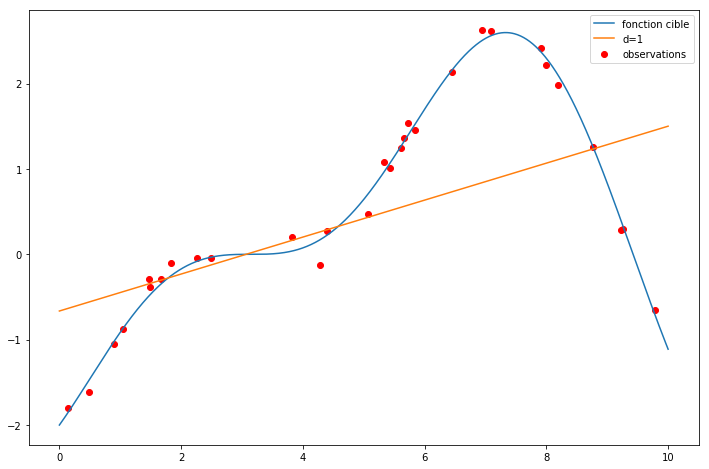

In [18]:
fig, ax = plt.subplots()
donnee.affichage(ax)
affichage(ax, cible)

x = np.linspace(0, 10, 1000)
ax.plot(x, mod.predict(x[:,np.newaxis]), label="d=1")
ax.legend();

In [33]:
def creation_modele(deg, X, y):
    mod = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(normalize=True))
    mod.fit(X=X, y=y)
    return mod

In [23]:
mod3 = creation_modele(3, X_train, y_train)

In [34]:
def affichage_modele(ax, mod):
    x = np.linspace(0, 10, 1000)
    degres = mod.get_params()['polynomialfeatures__degree']
    ax.plot(x, mod.predict(x[:,np.newaxis]), label="d={}".format(degres))

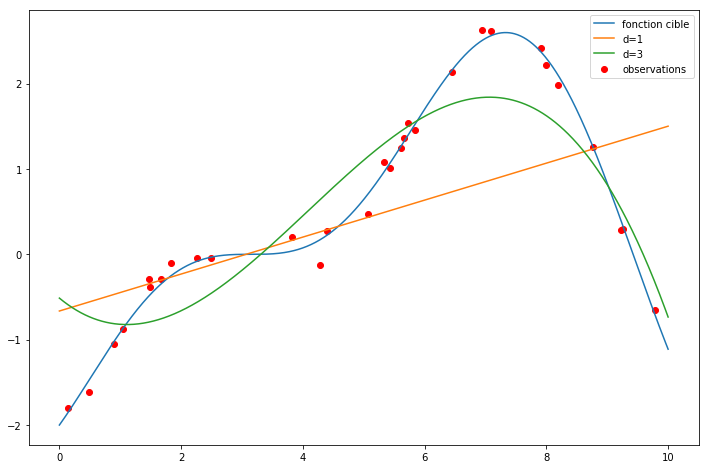

In [26]:
fig, ax = plt.subplots()
donnee.affichage(ax)
affichage(ax, cible)

affichage_modele(ax, mod)
affichage_modele(ax, mod3)
ax.legend();

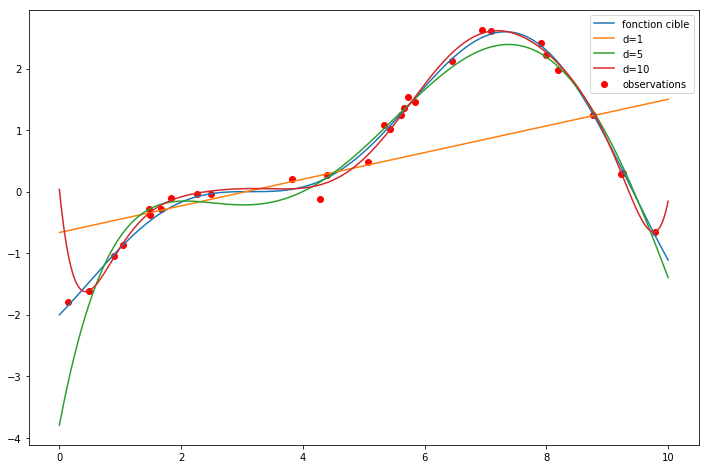

In [27]:
degres = [1, 5, 10]

fig, ax = plt.subplots()
donnee.affichage(ax)
affichage(ax, cible)

for d in degres:
    mod = creation_modele(d, X_train, y_train)
    affichage_modele(ax, mod)

ax.legend();

# Analyse Biais/Variance

In [42]:
donnees = Dataset(nb=50, err=0.1)
X_train, X_test, y_train, y_test = train_test_split(donnees.data, donnees.target)

In [43]:
print(X_train.shape)

(37, 1)


In [44]:
def creation_modele(deg, X, y):
    mod = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(normalize=True))
    mod.fit(X=X, y=y)
    return mod

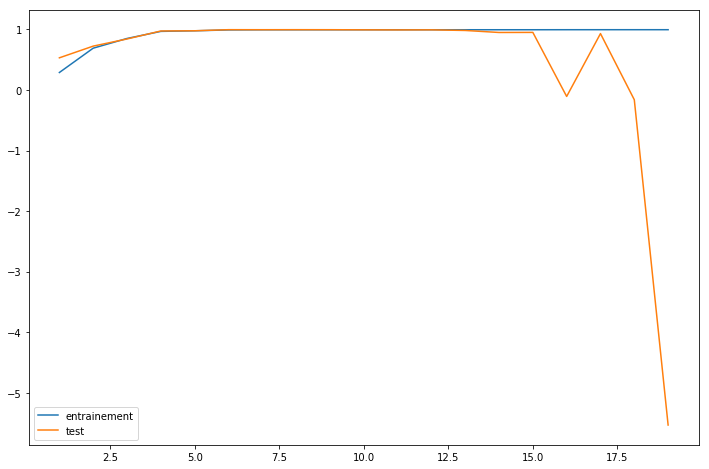

In [45]:
degres = list(range(1, 20))
modeles = [creation_modele(d, X_train, y_train) for d in degres]
resultats_train = [mod.score(X=X_train, y=y_train) for mod in modeles]
resultats_test = [mod.score(X=X_test, y=y_test) for mod in modeles]

plt.plot(degres, resultats_train, label="entrainement")
plt.plot(degres, resultats_test, label="test")
plt.legend();

# Cross-validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
donnees = Dataset(nb=50, err=0.1)
X_train, X_test, y_train, y_test = train_test_split(donnees.data, donnees.target)

In [58]:
def selection_modele(deg, X, y):
    mod = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(normalize=True))
    return cross_val_score(mod, X, y, cv=9)

In [60]:
dico = {d: selection_modele(d, X_train, y_train) for d in range(1, 20)}

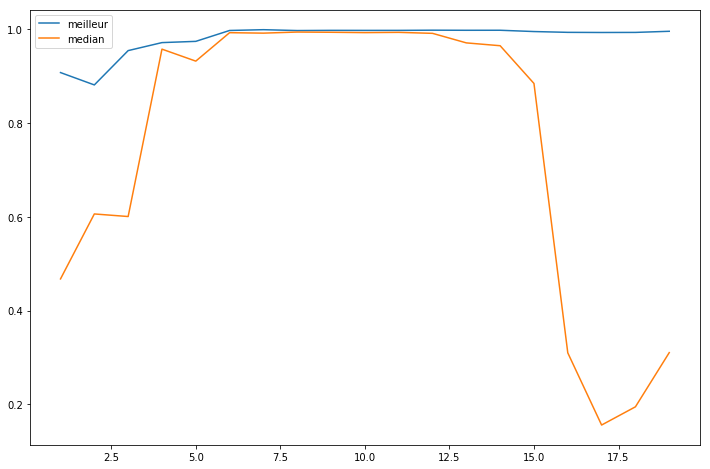

In [65]:
#plt.plot(dico.keys(), [val.mean() for val in dico.values()], label="moyenne")
plt.plot(dico.keys(), [val.max() for val in dico.values()], label="meilleur")
#plt.plot(dico.keys(), [val.min() for val in dico.values()], label="pire")
plt.plot(dico.keys(), [np.median(val) for val in dico.values()], label="median")
plt.legend();

In [67]:
mod = creation_modele(deg=10, X=X_train, y=y_train)

In [68]:
mod.score(X_test, y_test)

0.9885726659764322

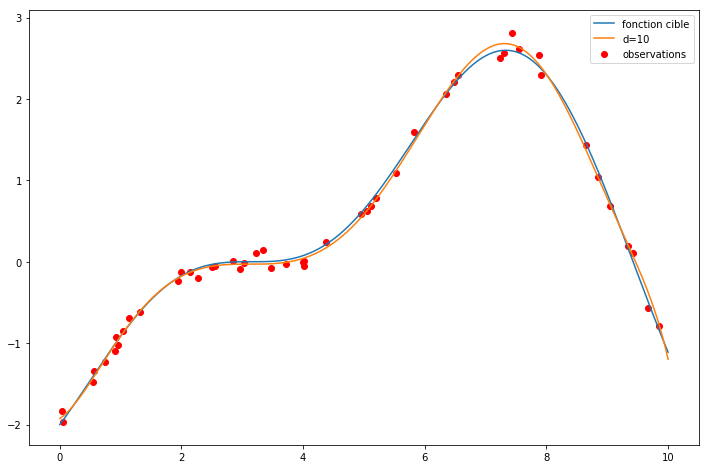

In [69]:
fig, ax = plt.subplots()

affichage(ax=ax, fonction=cible)
donnees.affichage(ax)
affichage_modele(mod=mod, ax=ax)
ax.legend();

In [70]:
mod = creation_modele(deg=20, X=X_train, y=y_train)
mod.score(X_test, y_test)

-191.30629630590389

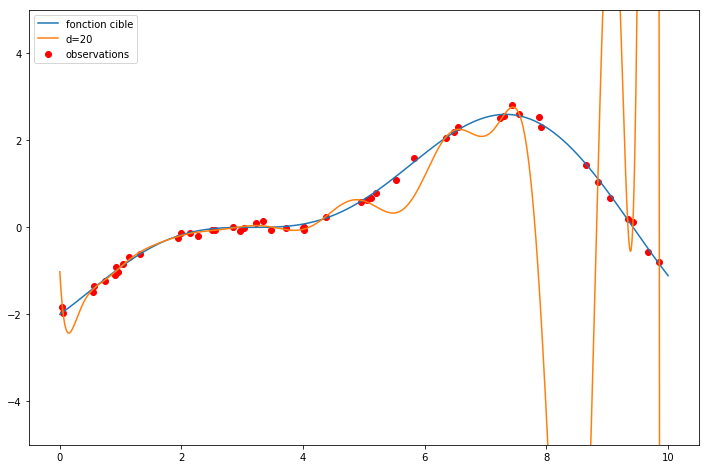

In [72]:
fig, ax = plt.subplots()

affichage(ax=ax, fonction=cible)
donnees.affichage(ax)
affichage_modele(mod=mod, ax=ax)
ax.set_ylim(-5, 5)
ax.legend();

In [73]:
mod.get_params()

{'memory': None,
 'steps': [('polynomialfeatures',
   PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)),
  ('linearregression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True))],
 'polynomialfeatures': PolynomialFeatures(degree=20, include_bias=True, interaction_only=False),
 'linearregression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
 'polynomialfeatures__degree': 20,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': 1,
 'linearregression__normalize': True}

In [75]:
l = mod.get_params()['linearregression']

In [76]:
type(l)

sklearn.linear_model.base.LinearRegression

In [77]:
l.coef_

array([ 0.00000000e+00, -2.49678267e+01,  1.54122226e+02, -4.16369384e+02,
        5.95642325e+02, -4.04370509e+02, -6.57462952e+01,  4.18086864e+02,
       -4.50716890e+02,  2.91328170e+02, -1.31474778e+02,  4.37360000e+01,
       -1.09904330e+01,  2.10792294e+00, -3.08833942e-01,  3.42984327e-02,
       -2.83670529e-03,  1.69205337e-04, -6.87520061e-06,  1.70248731e-07,
       -1.93791311e-09])

# Exercices

## Comparer avec RidgeRegression/Lasso/ElacticNet

In [78]:
from sklearn.linear_model import Lasso

## Choix des hyperparamètres par cross-validation

## Ajout d'un Scaler pour normaliser dans le pipeline entre PolynomialFeature et Lasso

In [80]:
from sklearn.preprocessing import MinMaxScaler, Normalizer